In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("whitegrid")
sns.set_context("talk")

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

(array([161., 257., 209., 153., 105.,  52.,  24.,  30.,   5.,   4.]),
 array([-0.1437449 ,  0.19329862,  0.53034214,  0.86738567,  1.20442919,
         1.54147271,  1.87851624,  2.21555976,  2.55260328,  2.88964681,
         3.22669033]),
 <BarContainer object of 10 artists>)

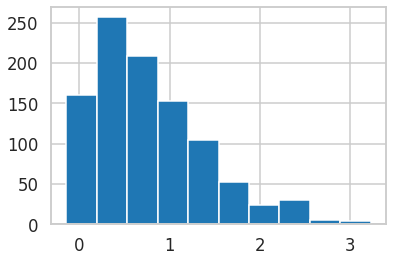

In [2]:
from scipy.stats import skewnorm
a=10
data= skewnorm.rvs(a, size=1000)

plt.hist(data)

In [3]:
data = [skewnorm.rvs(np.random.randint(20), size=100000000) for i in range(10)]
for i, d in enumerate(data):
    np.save(f"./data_{i}.npy", d, allow_pickle=True)

### method 1

CPU times: user 3min 24s, sys: 1min 25s, total: 4min 50s
Wall time: 3min 51s


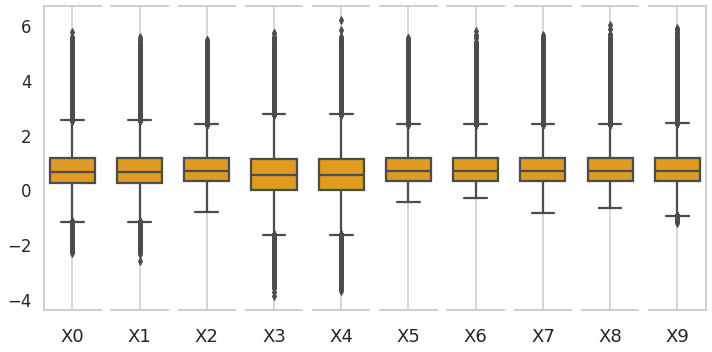

In [4]:
%%time

fig, axs = plt.subplots(ncols=10, sharey=True, figsize=(10,5))

for i, ax in enumerate(axs):
    data_small = np.load(f"./data_{i}.npy", allow_pickle=True)
    sns.boxplot(y=data_small, ax=axs[i], orient="v", color="orange")
    ax.set_xlabel(f"X{i}")
    ax.grid(b=None)

    if i != 0:
        ax.spines["left"].set_visible(False)
    if i != 9:
        ax.spines["right"].set_visible(False)

fig.tight_layout()
fig.savefig("43_toomany_1.png")

CPU times: user 3min 39s, sys: 1min 35s, total: 5min 14s
Wall time: 3min 57s


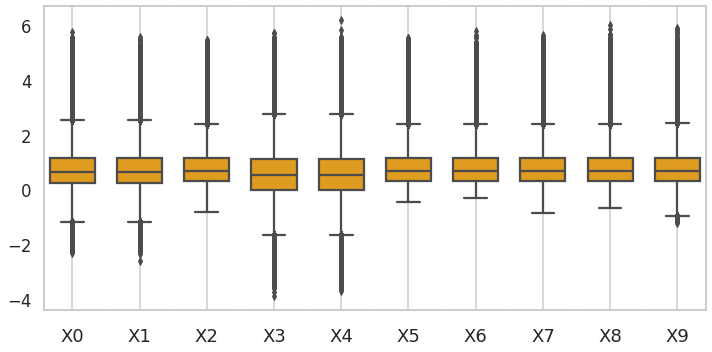

In [5]:
%%time

fig, axs = plt.subplots(ncols=10, sharey=True, figsize=(10,5))

for i, ax in enumerate(axs):
    data_small = np.load(f"./data_{i}.npy", allow_pickle=True)
    
    sns.boxplot(y=data_small, ax=axs[i], orient="v", color="orange")
    ax.set_xlabel(f"X{i}")
    ax.grid(b=None)
    if i != 0:
        ax.spines["left"].set_visible(False)
    if i != 9:
        ax.spines["right"].set_visible(False)
    
    del data_small

ax_big = fig.add_subplot(111)
ax_big.grid(b=None)
ax_big.set_facecolor("None")
ax_big.set_xticks([])
ax_big.set_yticks([])

fig.tight_layout()
fig.savefig("43_toomany_2.png")

### method 2

CPU times: user 951 ms, sys: 0 ns, total: 951 ms
Wall time: 3.01 s


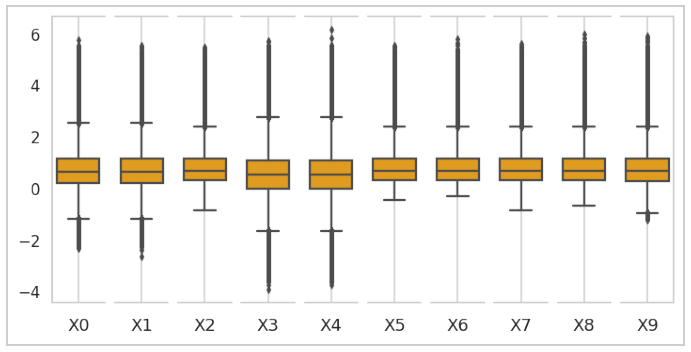

In [6]:
%%time

fig, ax = plt.subplots(figsize=(10,5))

# ax_big = fig.add_subplot(111)
ax.grid(b=None)
ax.set_facecolor("None")
ax.set_xticks([])
ax.set_yticks([])

im = plt.imread("./43_toomany_1.png")
ax.imshow(im)

fig.tight_layout()
fig.savefig("43_toomany_3.png")

In [8]:
from matplotlib import patches

CPU times: user 362 ms, sys: 0 ns, total: 362 ms
Wall time: 117 ms


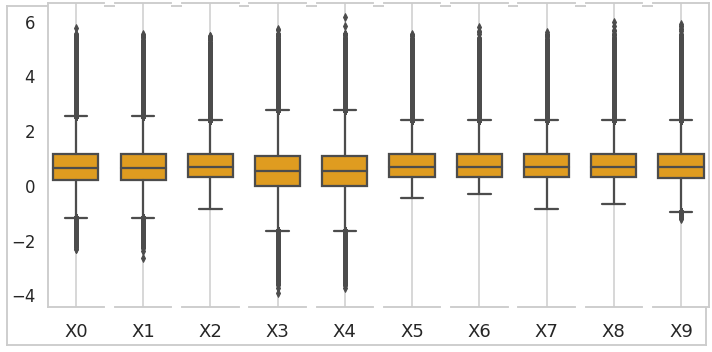

In [15]:
%%time

fig, ax = plt.subplots(figsize=(10, 5))

im = plt.imread("./43_toomany_1.png")
fig.figimage(im, resize=False)

ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

ax_big = fig.add_subplot(111)
ax_big.set_xticks([])
ax_big.set_yticks([])

fig.tight_layout()
fig.savefig("43_toomany_4.png")


CPU times: user 381 ms, sys: 0 ns, total: 381 ms
Wall time: 120 ms


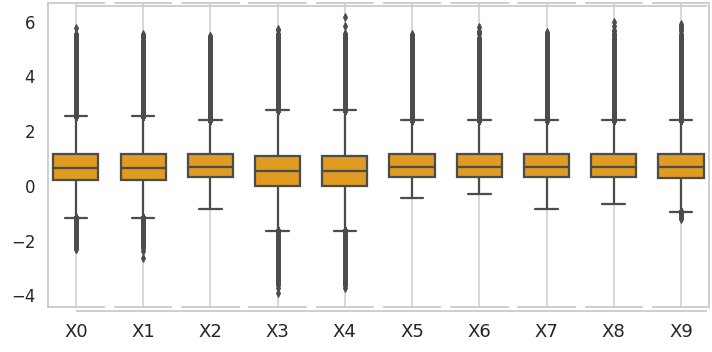

In [29]:
%%time

fig, ax = plt.subplots(figsize=(10, 5))

im = plt.imread("./43_toomany_1.png")
fig.figimage(im, resize=False)

ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

ax_big = fig.add_subplot(111, zorder=2)
ax_big.set_xticks([])
ax_big.set_yticks([])
ax_big.set_facecolor("none")

ax_big.spines["left"].set_visible(False)
ax_big.spines["right"].set_visible(False)
ax_big.spines["top"].set_bounds(0.1, 1)
ax_big.spines["bottom"].set_bounds(0.1, 1)
ax_big.spines["bottom"].set_position(("outward", -34))

fig.tight_layout()
fig.savefig("43_toomany_4.png")


CPU times: user 374 ms, sys: 0 ns, total: 374 ms
Wall time: 118 ms


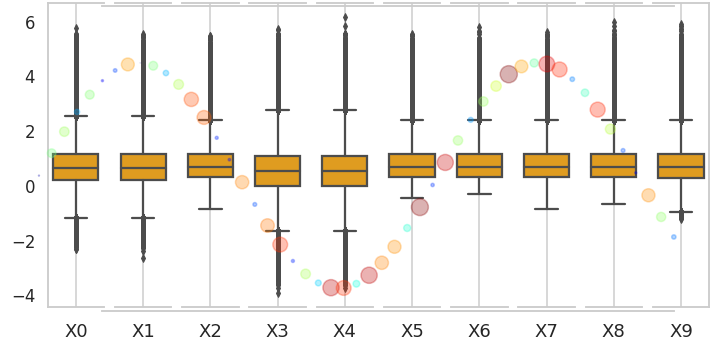

In [52]:
%%time

fig, ax = plt.subplots(figsize=(10, 5))

im = plt.imread("./43_toomany_1.png")
fig.figimage(im, resize=False)

ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

ax_big = fig.add_subplot(111, zorder=2)
ax_big.set_xticks([])
ax_big.set_yticks([])
ax_big.set_facecolor("none")

ax_big.spines["left"].set_visible(False)
ax_big.spines["right"].set_visible(False)
ax_big.spines["top"].set_bounds(0.1, 1)
ax_big.spines["bottom"].set_bounds(0.1, 1)
ax_big.spines["bottom"].set_position(("outward", -34))

X = np.linspace(0, 1, 51)
c = np.random.random(size=51)

ax_big.scatter(X, np.sin(10*X), c=c, s=300*c**2, cmap="jet", alpha=0.3)
ax_big.set_ylim(-1.5, 1.5)

fig.tight_layout()
fig.savefig("43_toomany_6.png")


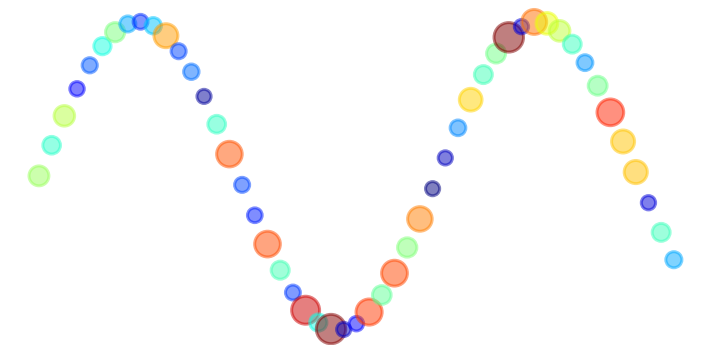

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
X = np.linspace(0, 1, 51)
c = np.random.random(size=51)
ax.scatter(X, np.sin(10*X), c=c, s=200 + 700*c**2, cmap="jet", alpha=0.5, linewidth=3)
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")
ax.grid(b=False)
fig.tight_layout()
fig.savefig("43_toomany_7.png")